In [40]:
from pyspark.sql.types import StructType, StructField, StringType
from pyspark.sql.types import DoubleType, BooleanType
from pyspark.sql.functions import col, udf
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

In [2]:
path = "../../../data/"

In [3]:
train = spark.read.csv(os.path.join(path, "train.csv"), header=True, inferSchema=True)

In [4]:
train.printSchema()

root
 |-- Id: string (nullable = true)
 |-- v2a1: double (nullable = true)
 |-- hacdor: integer (nullable = true)
 |-- rooms: integer (nullable = true)
 |-- hacapo: integer (nullable = true)
 |-- v14a: integer (nullable = true)
 |-- refrig: integer (nullable = true)
 |-- v18q: integer (nullable = true)
 |-- v18q1: integer (nullable = true)
 |-- r4h1: integer (nullable = true)
 |-- r4h2: integer (nullable = true)
 |-- r4h3: integer (nullable = true)
 |-- r4m1: integer (nullable = true)
 |-- r4m2: integer (nullable = true)
 |-- r4m3: integer (nullable = true)
 |-- r4t1: integer (nullable = true)
 |-- r4t2: integer (nullable = true)
 |-- r4t3: integer (nullable = true)
 |-- tamhog: integer (nullable = true)
 |-- tamviv: integer (nullable = true)
 |-- escolari: integer (nullable = true)
 |-- rez_esc: integer (nullable = true)
 |-- hhsize: integer (nullable = true)
 |-- paredblolad: integer (nullable = true)
 |-- paredzocalo: integer (nullable = true)
 |-- paredpreb: integer (nullable = tru

In [5]:
name_types = [(field.name, str(field.dataType)) for field in train.schema.fields]
type_distinct = np.unique(map(lambda p: p[1], name_types)).tolist()
np.unique(type_distinct).tolist()
# table.schema.fieldNames()

dic_types = {str(type_): [] for type_ in type_distinct}
for item in name_types:
    dic_types[str(item[1])].append(item[0])

for type_ in type_distinct:
    print("{0}: {1}".format(type_, len(dic_types[type_])))

DoubleType: 6
IntegerType: 132
StringType: 5


In [6]:
string_columns = dic_types["StringType"]
print(string_columns)
for column in ['Id', 'idhogar']:
    string_columns.remove(column)
print(string_columns)
train.select(string_columns).show(5)

['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa']
['dependency', 'edjefe', 'edjefa']
+----------+------+------+
|dependency|edjefe|edjefa|
+----------+------+------+
|        no|    10|    no|
|         8|    12|    no|
|         8|    no|    11|
|       yes|    11|    no|
|       yes|    11|    no|
+----------+------+------+
only showing top 5 rows



In [7]:
train.select("edjefa").groupBy("edjefa").count().show()

+------+-----+
|edjefa|count|
+------+-----+
|     7|  179|
|    15|  188|
|    11|  399|
|     3|  152|
|     8|  217|
|    16|  113|
|     5|  176|
|    18|    3|
|    17|   76|
|     6|  947|
|    19|    4|
|     9|  237|
|    no| 6230|
|    20|    2|
|    10|   96|
|   yes|   69|
|     4|  136|
|    12|   72|
|    13|   52|
|    14|  120|
+------+-----+
only showing top 20 rows



In [8]:
train.count()

9557

In [9]:
train.select("Target").groupBy("Target").count().orderBy("Target").show()

+------+-----+
|Target|count|
+------+-----+
|     1|  755|
|     2| 1597|
|     3| 1209|
|     4| 5996|
+------+-----+



In [10]:
print("Number of distinct person: {0}".format(train
                                              .select("Id")
                                              .distinct()
                                              .count()))

Number of distinct person: 9557


In [11]:
print("Number of distinct household: {0}".format(train
                                                 .select("idhogar")
                                                 .distinct()
                                                 .count()))

Number of distinct household: 2988


In [12]:
train_pandas = train.toPandas()

In [13]:
train_pandas

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.000000,100.000000,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.000000,144.000000,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.000000,121.000000,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.000000,121.000000,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.000000,121.000000,1369,4
5,ID_ec05b1a7b,180000.0,0,5,0,1,1,1,1.0,0,...,121,1444,16,121,4,1.777778,1.000000,121.000000,1444,4
6,ID_e9e0c1100,180000.0,0,5,0,1,1,1,1.0,0,...,4,64,16,121,4,1.777778,1.000000,121.000000,64,4
7,ID_3e04e571e,130000.0,1,2,0,1,1,0,NaN,0,...,0,49,16,81,4,16.000000,1.000000,100.000000,49,4
8,ID_1284f8aad,130000.0,1,2,0,1,1,0,NaN,0,...,81,900,16,81,4,16.000000,1.000000,100.000000,900,4
9,ID_51f52fdd2,130000.0,1,2,0,1,1,0,NaN,0,...,121,784,16,81,4,16.000000,1.000000,100.000000,784,4


In [14]:
sns.__version__

'0.9.0'

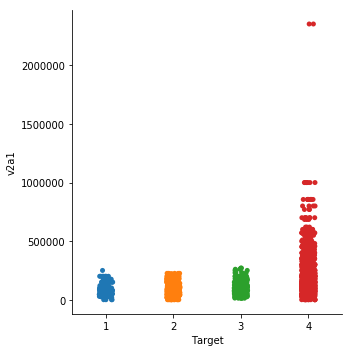

In [15]:
sns.catplot(x="Target", y="v2a1", data=train_pandas);

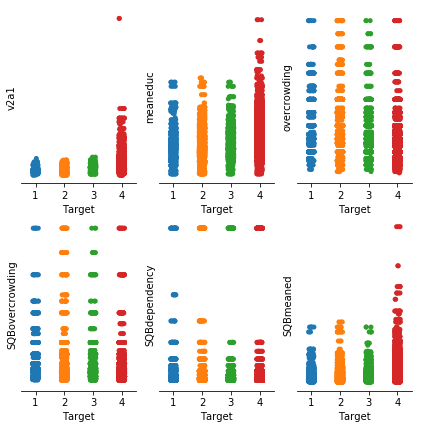

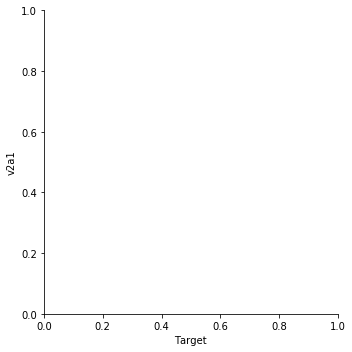

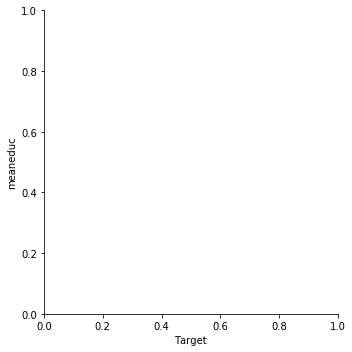

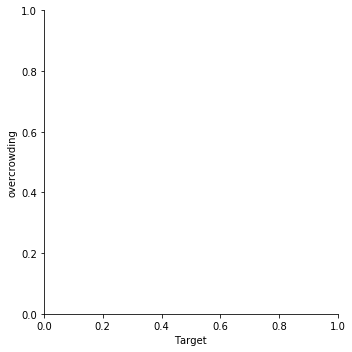

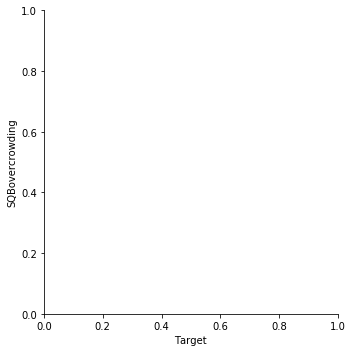

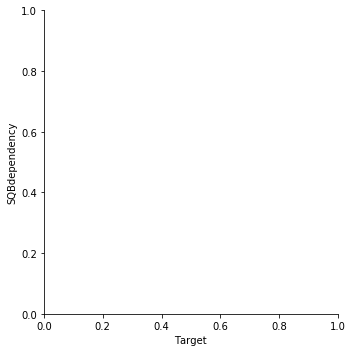

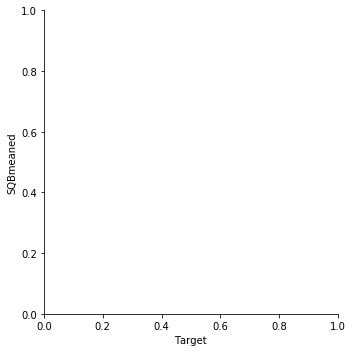

In [16]:
f, axes = plt.subplots(nrows=2, ncols=3, figsize=(7, 7))
sns.despine(left=True)
list_ax = [y for x in axes.tolist() for y in x]
for index,axe in enumerate(list_ax):
    sns.catplot(x="Target", y=dic_types["DoubleType"][index], data=train_pandas, ax=axe);         
plt.setp(axes, yticks=[])
plt.tight_layout()    

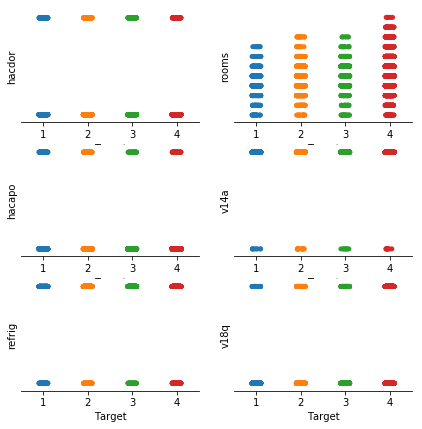

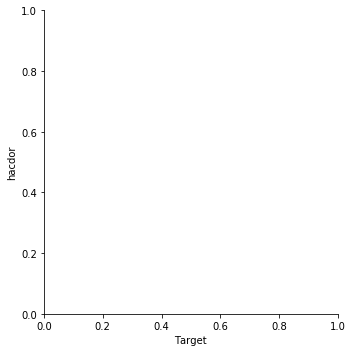

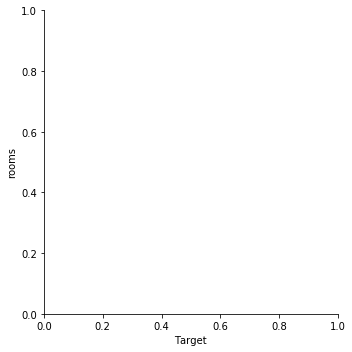

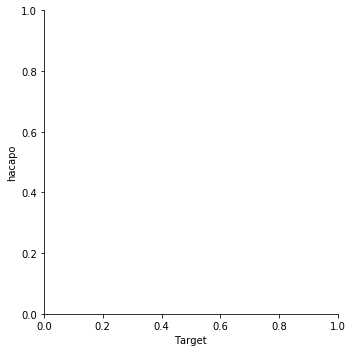

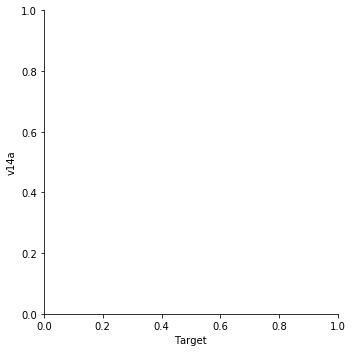

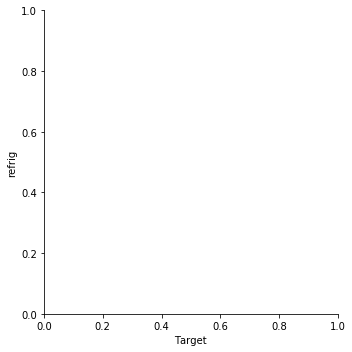

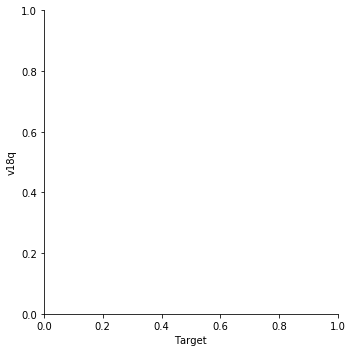

In [17]:
f, axes = plt.subplots(nrows=3, ncols=2, figsize=(7, 7))
sns.despine(left=True)
list_ax = [y for x in axes.tolist() for y in x]
for index,axe in enumerate(list_ax):
    sns.catplot(x="Target", y=dic_types["IntegerType"][index], data=train_pandas, ax=axe);         
plt.setp(axes, yticks=[])
plt.tight_layout()

In [62]:
for column in train.columns:
    data = train.select(column).distinct().rdd.map(lambda p: p[column]).collect()
    if None in data:
        print(column)

v2a1
v18q1
rez_esc
meaneduc
SQBmeaned


## Column: v2a1

In [25]:
target_v2a1_collect = (train
                .select("Target", "v2a1")
                .rdd.map(lambda p: (p["Target"], p["v2a1"]))
                .collect())

target_collect = np.unique(map(lambda p: p[0], target_v2a1_collect)).tolist()
v2a1_collect = map(lambda p: p[1], target_v2a1_collect)

In [31]:
v2a1_values = {target: [] for target in target_collect}
for target,v2a1 in target_v2a1_collect:
    if v2a1 is not None:
        v2a1_values[target].append(v2a1)

v2a1_mean = {target: float(np.mean(v2a1_values[target])) for target in target_collect}

In [32]:
v2a1_mean

{1: 84806.46405228759,
 2: 97015.16617210682,
 3: 102618.09333333334,
 4: 193589.25852123756}

## Column: v18q1

In [47]:
target_v18q1_collect = (train
                .select("Target", "v18q1")
                .rdd.map(lambda p: (p["Target"], p["v18q1"]))
                .collect())

target_collect = np.unique(map(lambda p: p[0], target_v18q1_collect)).tolist()
v18q1_collect = map(lambda p: p[1], target_v18q1_collect)

In [54]:
v18q1_values = {target: [] for target in target_collect}
for target,v18q1 in target_v18q1_collect:
    if v18q1 is not None:
        v18q1_values[target].append(v18q1)

v18q1_mean = {target: int(round(np.mean(v18q1_values[target]))) for target in target_collect}

In [55]:
v18q1_mean

{1: 2, 2: 1, 3: 1, 4: 1}

## Column: rez_esc

In [63]:
train.select("rez_esc").distinct().show()

+-------+
|rez_esc|
+-------+
|   null|
|      1|
|      3|
|      5|
|      4|
|      2|
|      0|
+-------+



In [ ]:
## Column: meaneduc

In [65]:
train.select("SQBmeaned").distinct().show()

+------------------+
|         SQBmeaned|
+------------------+
|            1369.0|
|             169.0|
|          126.5625|
|               0.0|
|312.11107999999996|
|            272.25|
|             729.0|
|         96.040001|
|          105.0625|
|         113.77779|
|         40.960003|
|           33.0625|
|         91.612236|
|             625.0|
|            110.25|
|         163.84001|
|           39.0625|
|            306.25|
|            600.25|
|         60.840004|
+------------------+
only showing top 20 rows

